# Tarea 2
## Importación de módulos

In [331]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from IPython.display import display
import matplotlib.pyplot as plt


## Clase del problema

In [332]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3,#Cantidad de genes por cromosoma
                        n_obj=2,#cantidad de funciones objetivo
                        xl=0,#Limite inferior del valor del gen
                        xu=200)#Limite superior del valor de gen
        
    def _evaluate(self, x, out, *args, **kwargs):
        
        # Cantidad de tornos
        T = x[0]
        # Cantidad de fresadoras
        F = x[1]
        # Cantidad de multiproposito
        M = x[2]
        
        #Se definen las penalizaciones por el sobrepaso de material 
        penCab = 280 - (2*T+F+5*M)#Cableado
        penM  = 120 - (6*T+3*F+12*M)#Motores
        penCar = 670 - (2*T+8*F+4*M)#Carcasas
        penA = 250 - (2*T+6*F+6*M)#Actuadores
        
        penalizaciones = [penCab, penM, penCar, penA] #Vector con las penalizaciones
        
        pen = 0
        #Sumatoria de penalizaciones
        for i in range(4):
            if penalizaciones[i] < 0:
                pen = pen + penalizaciones[i]
        
        #Funciones objetivo
        f1 = -(4*T+8*F+12*M)+15*pen**2 #Funcion que busca la mayor ganancia
        f2 = (abs(T-F)+abs(T-M)+abs(F-M))**2#Funcion que busca la cantidad de unidades sea uniforme
        
        out["F"] = [f1, f2]
        
problem = MyProblem()    

## Inicialización del algoritmo

In [333]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.crossover.pntx import SinglePointCrossover

# Se utiliza el algoritmo NSGA2 
#Automaticamente se utiliza un el algoritmo de torneo para la selección del cruzamiento
algorithm = NSGA2(pop_size=200,#Numero de la poblacion inicial 
                sampling=IntegerRandomSampling(),
                crossover=SinglePointCrossover(),
                mutation=PM(prob=0.05, vtype=float, repair=RoundingRepair()),#Mutacion
                eliminate_duplicates = True)

## Criterio de parada

In [334]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 100)#Cantidad de generaciones

## Optimización

In [335]:
from pymoo.optimize import minimize
#Se utiliza una funcion de minimización para minimizar las funciones objetivo
res = minimize(problem,
            algorithm,
            termination,
            save_history=True,
            verbose=True)
X = res.X #Vector de soluciones
F = res.F #Vector con las calidades de cada individuo
hist = res.history
len(X)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      200 |      3 |             - |             -
     2 |      400 |      6 |  0.1512585029 |             f
     3 |      600 |      5 |  0.0177441802 |         ideal
     4 |      800 |      4 |  0.9396825397 |         nadir
     5 |     1000 |      4 |  0.0857142857 |         ideal
     6 |     1200 |      5 |  0.8537095089 |         nadir
     7 |     1400 |      7 |  0.0420458870 |             f
     8 |     1600 |      9 |  0.2989010989 |         nadir
     9 |     1800 |     15 |  0.2142214104 |         nadir
    10 |     2000 |     14 |  0.0082464029 |             f
    11 |     2200 |     14 |  0.0070195592 |             f
    12 |     2400 |     16 |  5.412810E+01 |         nadir
    13 |     2600 |     17 |  0.0036549825 |             f
    14 |     2800 |     20 |  0.0080821214 |             f
    15 |     3000 |     19 |  0.0028066057 |             f
    16 |     3200 |     18 |  0.0025591425 |            

36

## Convergencia de Cada Objetivo

In [336]:

#n_evals = np.array([e.evaluator.n_eval for e in res.history])
#opt = np.array([e.opt[0].F for e in res.history])
#plt.title("Convergencia")
#plt.plot(n_evals, opt, "--")
#plt.show()

from pymoo.indicators.hv import HV

pf = res.F # se guarda el frente de pareto
A = pf[::7] # se toma una muestra del frente cada 7 soluciones
display(A)
ref_point = np.array([-120, 6000]) # se pone el punto de referencia (un punto muy malo) como -120 para f1 y 6000 para f2 

ind = HV(ref_point=ref_point) # se calcula el indicador del hypervolumen
print("HV", '%.5f' % ind(A)) # se imprime el indicador con cinco decimales


array([[-228., 1764.],
       [-172.,  256.],
       [-248., 2500.],
       [-204.,  900.],
       [-276., 3844.],
       [-216., 1296.]])

HV 699536.00000


## Visualización de Resultados

array([[-2.280e+02,  1.764e+03],
       [-1.960e+02,  7.840e+02],
       [-2.800e+02,  4.096e+03],
       [-1.200e+02,  0.000e+00],
       [-1.840e+02,  4.840e+02],
       [-2.480e+02,  2.500e+03],
       [-2.160e+02,  1.296e+03],
       [-1.720e+02,  2.560e+02],
       [-1.600e+02,  1.000e+02],
       [-3.080e+02,  5.776e+03],
       [-1.920e+02,  5.760e+02],
       [-2.600e+02,  3.136e+03],
       [-1.400e+02,  4.000e+00],
       [-1.640e+02,  1.960e+02],
       [-2.480e+02,  2.500e+03],
       [-3.000e+02,  5.184e+03],
       [-2.440e+02,  2.304e+03],
       [-1.520e+02,  6.400e+01],
       [-2.120e+02,  1.156e+03],
       [-2.560e+02,  2.704e+03],
       [-2.240e+02,  1.444e+03],
       [-2.040e+02,  9.000e+02],
       [-1.520e+02,  6.400e+01],
       [-2.600e+02,  3.136e+03],
       [-2.920e+02,  4.900e+03],
       [-2.680e+02,  3.364e+03],
       [-2.280e+02,  1.764e+03],
       [-2.800e+02,  4.096e+03],
       [-2.760e+02,  3.844e+03],
       [-1.960e+02,  7.840e+02],
       [-1

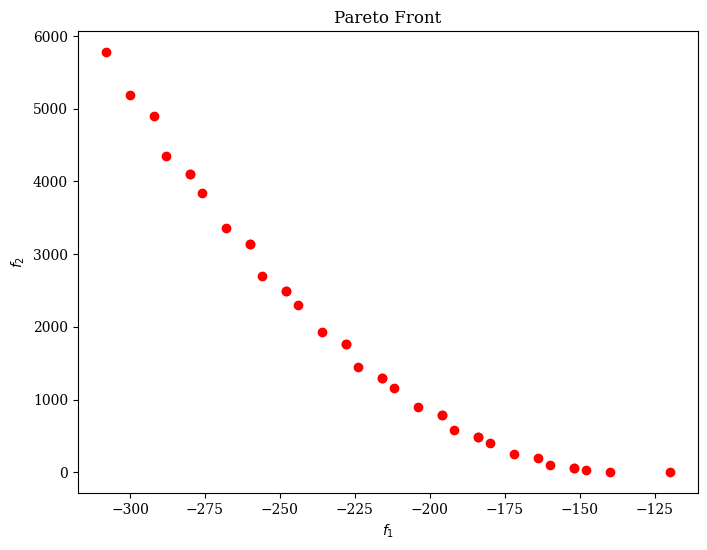

In [337]:
from pymoo.visualization.scatter import Scatter
plot = Scatter(title="Pareto Front")
plot.add(res.F, color="red")
display(res.F)
plot.show()

In [338]:
len(X)

36

In [339]:
X[:]

array([[ 1, 22,  4],
       [ 2, 16,  5],
       [ 1, 33,  1],
       [ 5,  5,  5],
       [ 4, 15,  4],
       [ 2, 27,  2],
       [ 3, 21,  3],
       [ 4, 12,  5],
       [ 5, 10,  5],
       [ 1, 38,  0],
       [ 4, 16,  4],
       [ 0, 28,  3],
       [ 5,  6,  6],
       [ 4, 11,  5],
       [ 1, 26,  3],
       [ 0, 36,  1],
       [ 3, 26,  2],
       [ 5,  9,  5],
       [ 4, 20,  3],
       [ 2, 28,  2],
       [ 3, 22,  3],
       [ 3, 18,  4],
       [ 4,  8,  6],
       [ 1, 29,  2],
       [ 0, 35,  1],
       [ 1, 30,  2],
       [ 2, 23,  3],
       [ 0, 32,  2],
       [ 2, 32,  1],
       [ 3, 17,  4],
       [ 3, 14,  5],
       [ 2, 24,  3],
       [ 6,  8,  5],
       [ 1, 34,  1],
       [ 5, 14,  4],
       [ 2, 20,  4]])

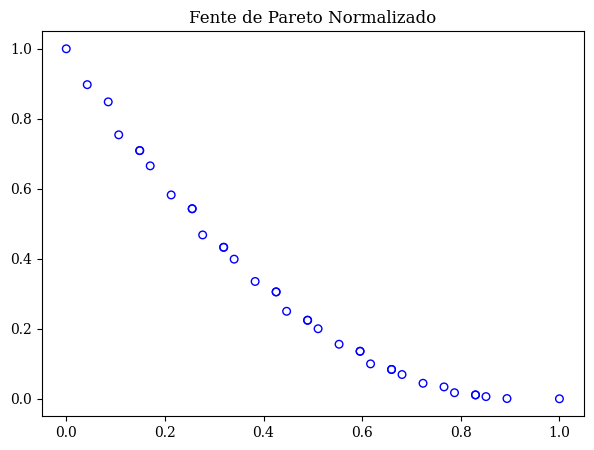

In [340]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)#Normalización del frente de Pareto
plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Fente de Pareto Normalizado")
plt.show()

## Mejor resultado por medio de Compromise Programing 

Best regarding ASF: Point 
i = 31
F = [-236. 1936.]
X = [ 2 24  3]


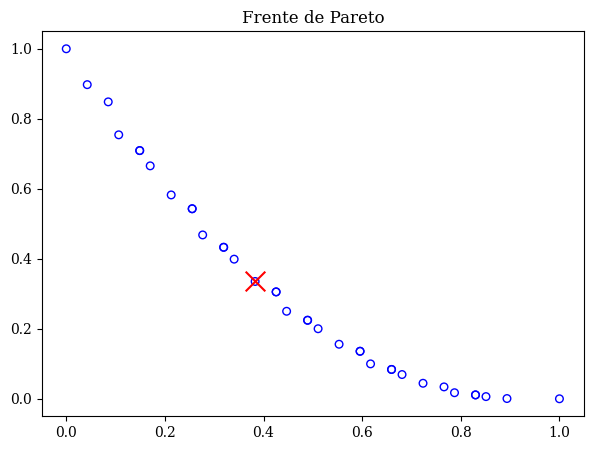

In [341]:
from pymoo.decomposition.asf import ASF


weights = np.array([0.5, 0.5])#Peso que determina la importacia de las soluciones
decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()
print("Best regarding ASF: Point \ni = %s\nF = %s\nX = %s" % (i, F[i], X[i]))

#Se grafica el resultado
plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(nF[i, 0], nF[i, 1], marker="x", color="red", s=200)
plt.title("Frente de Pareto")
plt.show()

# Referencias

#### https://pymoo.org/getting_started/index.html
#### https://pymoo.org/customization/discrete.html
#### https://pymoo.org/interface/problem.html
